### 1.Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE +  L2-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

 В линейной регрессии мы пытаемся найти набор параметров θ, который минимизирует ошибку между предсказанными моделью значениями $ \widehat {y}$ и истинными значениями $ {y} $.<br>
 $ \widehat {y}=X  \theta $ <br><br>
 Где $ {X} $ - матрица признаков размером $ {m}×{n} $, где $ {m} $ — это количество образцов, а $ {n} $ — количество признаков. Обычно в первую колонку $ {X} $ добавляют единицы, которые используются для смещения.<br>
$  \theta  $ — это вектор параметров размером n×1.


функцией потерь MSE:<br><br>
$ {J} $( $ \theta $ )= $ \frac {1}{2m} $ $ \sum _ {i=1}^ {m} $ $ (\widehat {y}^ {(i)}-y^ {(i)})^ {2} $ = $ \frac {1}{2m} $ $ (\widehat {y}-y)^ {T} $ ( $ \widehat {y} $ -y)


Добавим L2 регуляризационного члена (регрессия Ridge)<br><br>
$ {J} $( $ \theta $ )= $ \frac {1}{2m} $ $ (\widehat {y}-y)^ {T} $ ( $ \widehat {y} $ -y) +  $\frac {\lambda}{2} $ $\theta^{T} \theta $ <br><br>
Где $ \lambda $ - интенсивность регуляризации.



Вычислим градиент функции потерь<br><br>
  $ \nabla J(  \theta  )= \frac {\partial J(\theta )}{\partial \theta } $ = $ \frac {1}{m} $ $ X^ {T} $ (X $\theta$ -y)+ $ \lambda \theta $ <br><br>
  $\widehat {y} = {X}\theta$
  <br><br>
$
\theta = \theta - \alpha \left( \frac{1}{m} X^T (X\theta - y) + \lambda \theta \right)
$
<br>
Где $ {a} $ - Скорость обучение.



In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from ucimlrepo import fetch_ucirepo 

In [178]:

def gradient_descent(X, y, alpha=0.1, n_iterations=1000, lambda_reg=0.01):  
    """  
    Параметры:
    - X: матрица признаков, форма (m, n)
    - y: целевой вектор, форма (m, )
    - alpha: скорость обучения, по умолчанию 0.1
    - n_iterations: максимальное количество итераций, по умолчанию 1000
    - lambda_reg: коэффициент L2 регуляризации, по умолчанию 0.01
 
    """  
    m, n = X.shape  
    # Инициализация параметра theta
    theta = np.zeros(n)  
    cost_history = []  
    
    for i in range(n_iterations):  
        # Вычисление прогнозных значений
        y_pred = X.dot(theta)  
        error = y_pred - y  
        # Вычисление градиента 
        gradient = (1/m) * X.T.dot(error) + lambda_reg * theta  
        gradient[0] = (1/m) * np.sum(error)  # Градиент смещения  
        theta = theta - alpha * gradient  
        #Вычисления проводятся без смещения.
        cost = (1/(2*m)) * np.sum(error**2) + (lambda_reg/2) * np.sum(theta[1:]**2)  
        cost_history.append(cost)  
         
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-7:  
            break  
    
    return theta

### 2.Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).

Используем готовый набор данных concrete_compressive_strength из UC Irvine Machine Learning Repo

In [3]:
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165)

### 3.Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [4]:
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 

In [5]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_compressive_strength.variables

,name,role,type,demographic,description,units,missing_values
0,Cement,Feature,Continuous,None,None,kg/m^3,no
1,Blast Furnace Slag,Feature,Integer,None,None,kg/m^3,no
2,Fly Ash,Feature,Continuous,None,None,kg/m^3,no
3,Water,Feature,Continuous,None,None,kg/m^3,no
4,Superplasticizer,Feature,Continuous,None,None,kg/m^3,no
5,Coarse Aggregate,Feature,Continuous,None,None,kg/m^3,no
6,Fine Aggregate,Feature,Continuous,None,None,kg/m^3,no
7,Age,Feature,Integer,None,None,day,no
8,Concrete compressive strength,Target,Continuous,None,None,MPa,no


Очевидно, выбранный набор данных не содержит пропущенных значений, поэтому очистка данных не требуется.

### 4.Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

Вывод: прочность бетона на сжатие(Concrete compressive strength) имеет высокую корреляцию с такими характеристиками, как цемент(Cement), Суперпластификатор(Superplasticizer) и возраст(Age).

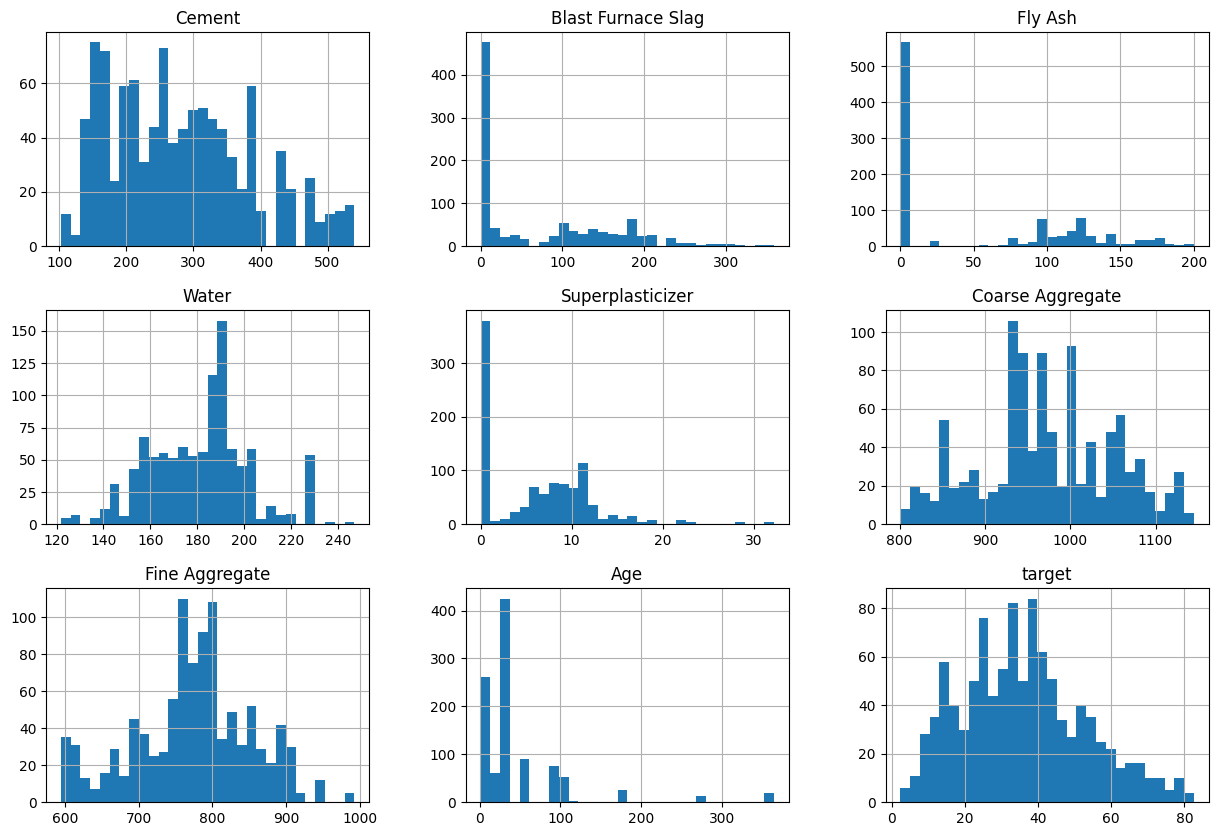

In [16]:
df.hist(bins=30, figsize=(15,10))  
plt.show()  

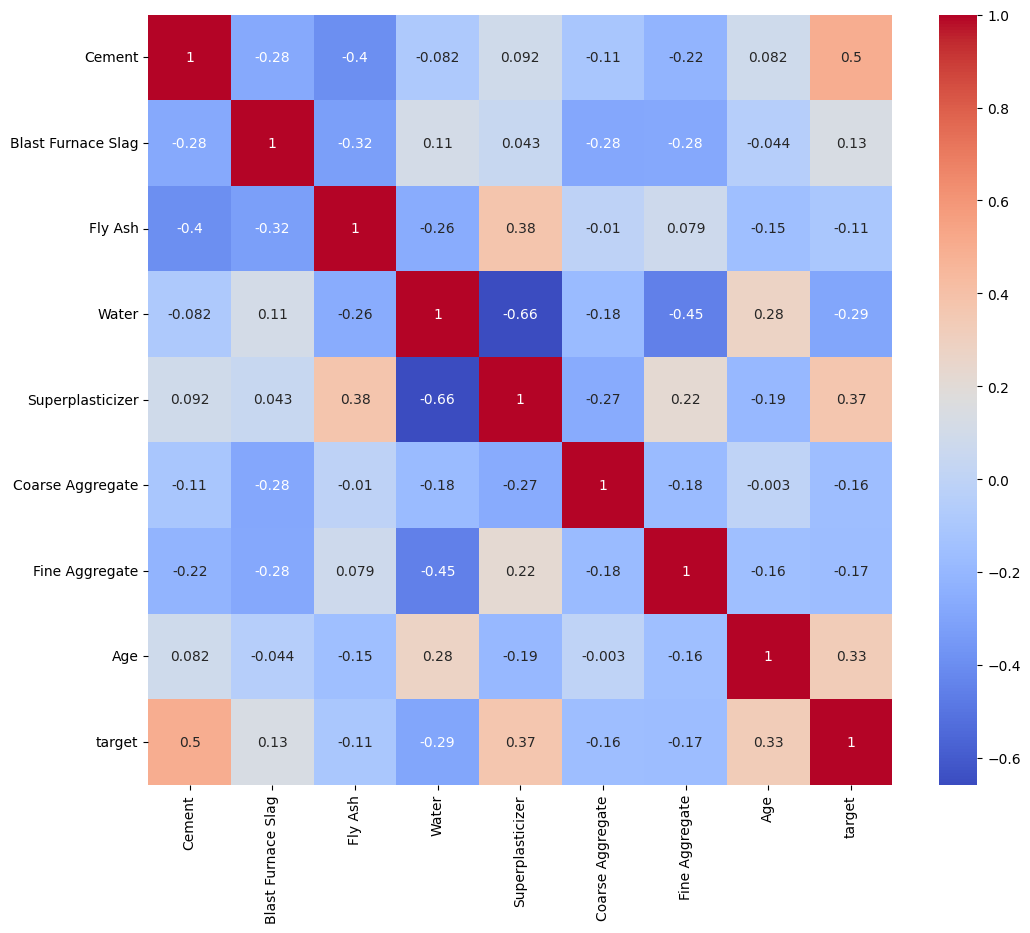

In [18]:
plt.figure(figsize=(12,10))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  
plt.show()  

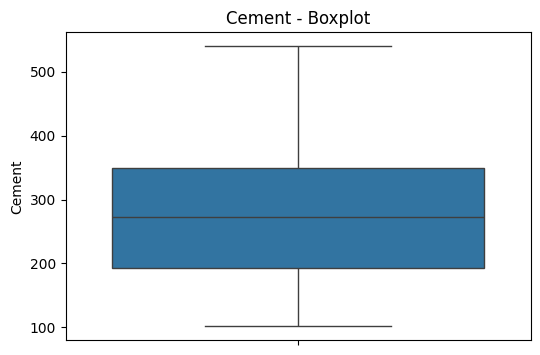

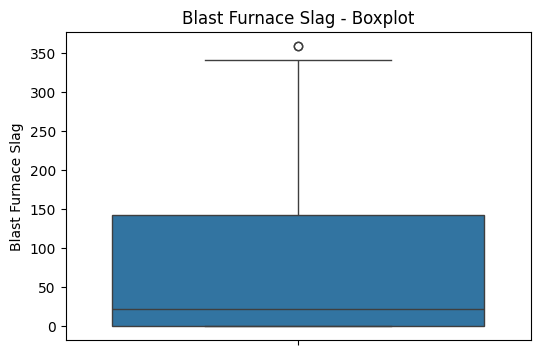

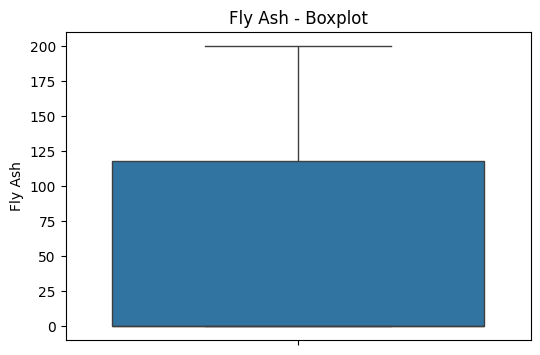

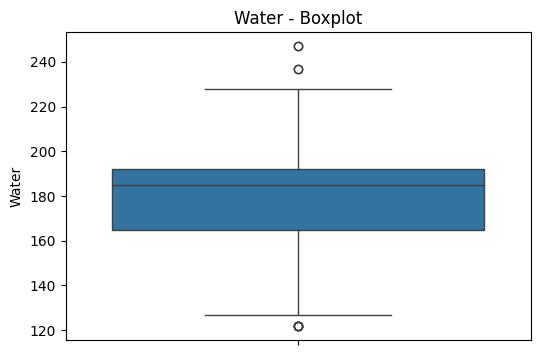

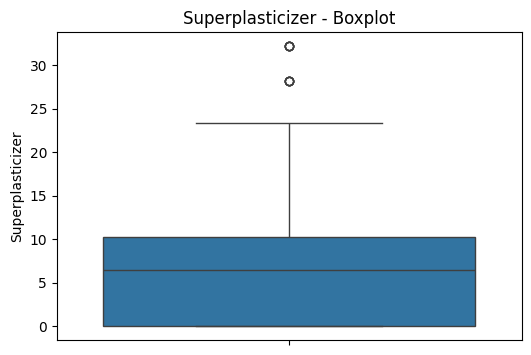

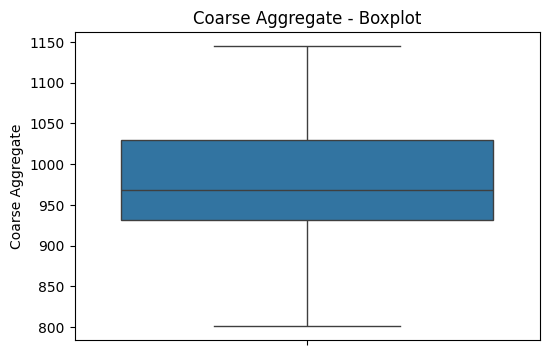

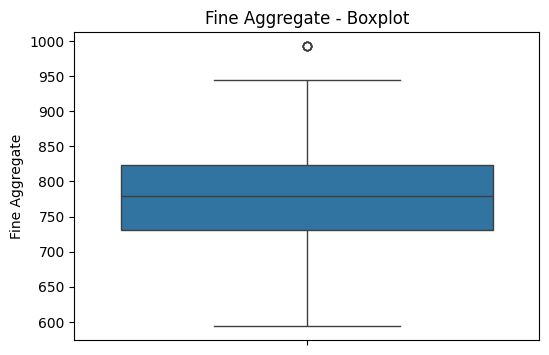

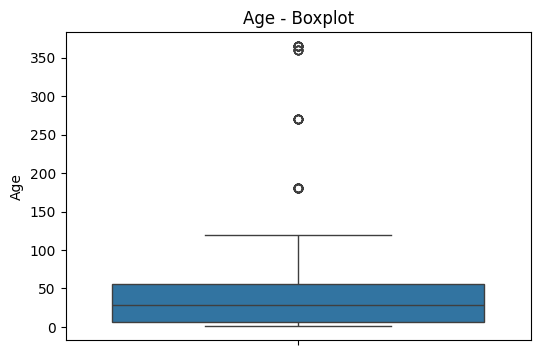

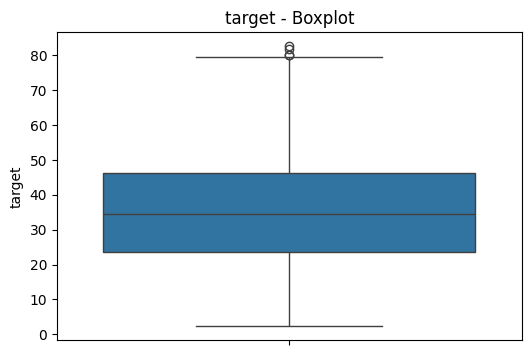

In [22]:
for column in df.columns:  
    plt.figure(figsize=(6,4))  
    sns.boxplot(y=df[column])  
    plt.title(f"{column} - Boxplot")  
    plt.show()  

### 5.При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Согласно построенной корреляционной матрицы можно наблюдать,что такие характиристики,как Blast Furnace Slag,Fly Ash,имеют незначительное отношениек прогнозу,поэтому их можно удалить 

In [80]:
df_new = df.drop(['Blast Furnace Slag','Fly Ash'],axis=1)

In [75]:
df_new

,Cement,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,target
0,540.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,228.0,0.0,932.0,594.0,270,40.27
3,332.5,228.0,0.0,932.0,594.0,365,41.05
4,198.6,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...
1025,276.4,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,175.6,11.3,989.6,788.9,28,32.77


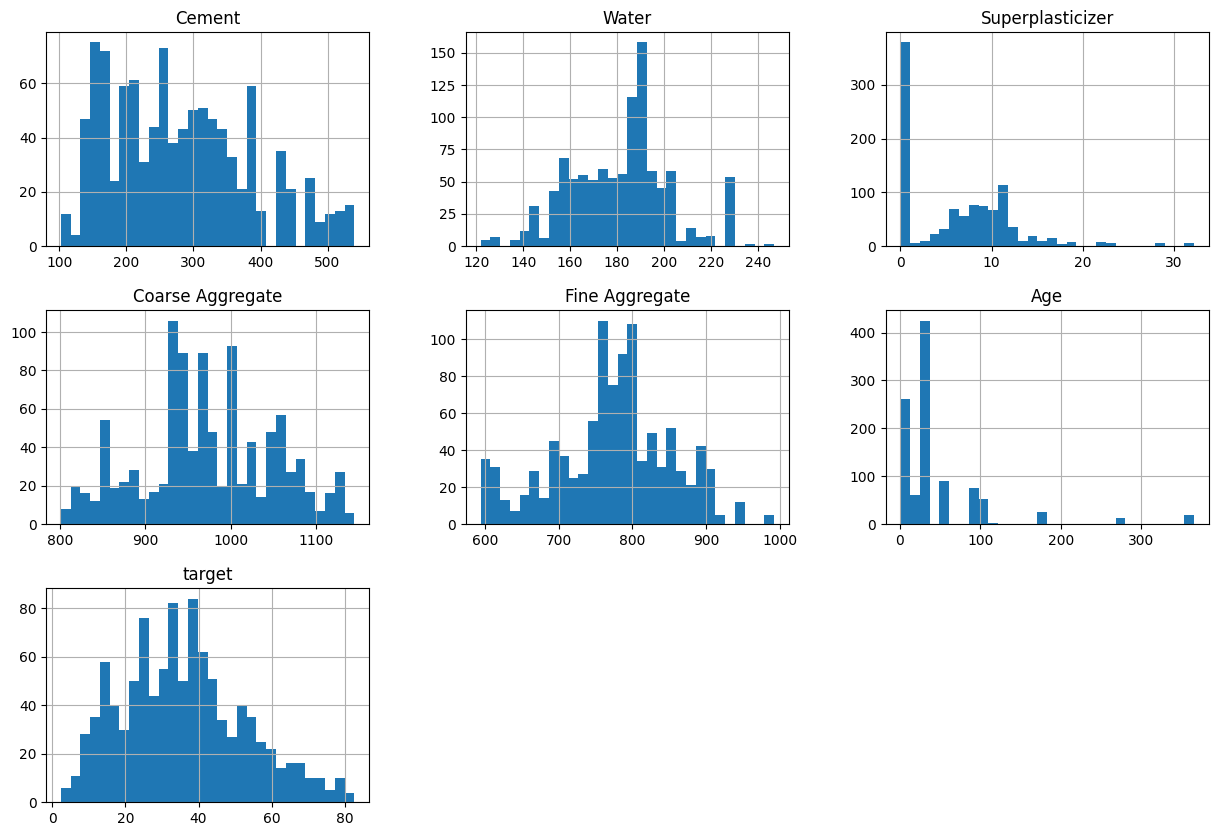

In [76]:
df_new.hist(bins=30, figsize=(15,10))  
plt.show()  

Анализируя гистограмму и показатели асимметрии, можно заметить, что некоторые признаки, такие как Superplasticizer и Age, имеют асимметричное распределение. Проводим преобразование данных, чтобы они приближались к нормальному распределению, что улучшает точность модели. 
Здесь мы используем преобразование квадратного корня（Square Root Transformation）и Логарифмическое преобразование(Log Transformation).

In [77]:
skewness = df_new.iloc[:,:-1].skew()
skewness

Cement              0.509481
Water               0.074628
Superplasticizer    0.907203
Coarse Aggregate   -0.040220
Fine Aggregate     -0.253010
Age                 3.269177
dtype: float64

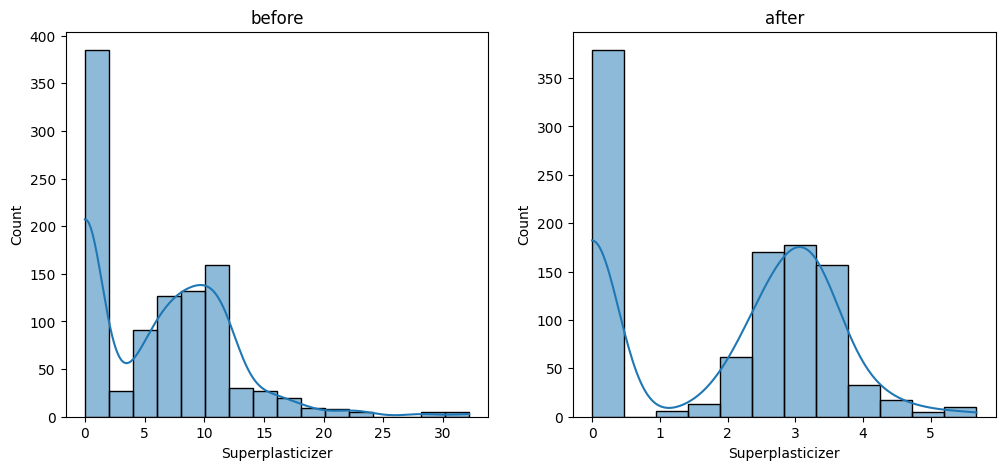

In [81]:
original_data = df_new['Superplasticizer']
sqrt_transformed = np.sqrt(original_data)

# Построим графики распределения до и после преобразования
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(original_data, ax=ax[0], kde=True)
ax[0].set_title('before')
sns.histplot(sqrt_transformed, ax=ax[1], kde=True)
ax[1].set_title('after')
plt.show()
df_new['Superplasticizer'] = sqrt_transformed

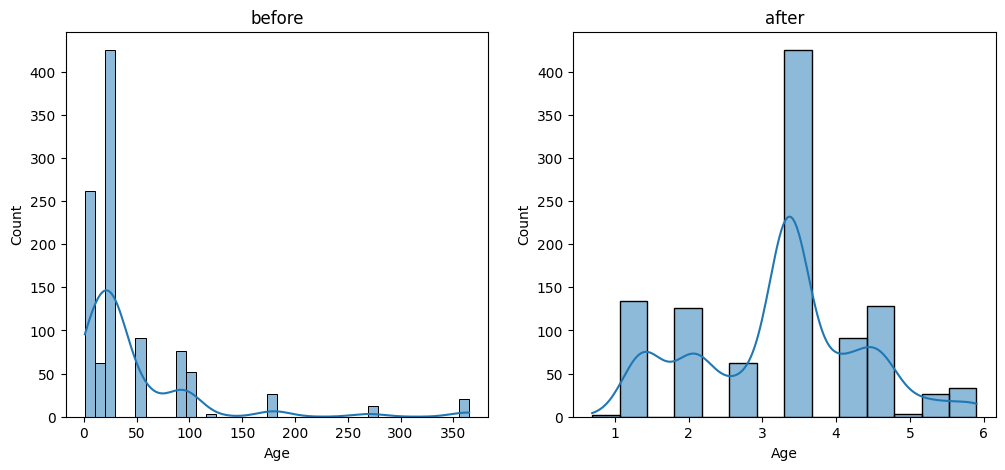

In [83]:
original_data = df_new['Age']
log_transformed = np.log1p(original_data)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(original_data, ax=ax[0], kde=True)
ax[0].set_title('before')
sns.histplot(log_transformed, ax=ax[1], kde=True)
ax[1].set_title('after')
plt.show()
df_new['Age'] = log_transformed

In [72]:
skewness = df_new.iloc[:,:-1].skew()
skewness

Cement              0.509481
Water               0.074628
Superplasticizer   -0.324821
Coarse Aggregate   -0.040220
Fine Aggregate     -0.253010
Age                -0.005085
dtype: float64

### 6.Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [179]:
from sklearn.model_selection import train_test_split
X = df_new.drop('target',axis=1).values
y = df_new['target'].values
#Добавление столбца единиц для свободного члена(инстерсепта)
X = np.hstack((np.ones((X.shape[0],1)),X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.При обучении моделей использовать масштабирование данных.

In [180]:
from sklearn.preprocessing import StandardScaler

# Инициализация стандартизатора
scaler = StandardScaler()

# Масштабируем признаки (пропускаем столбец единиц для интерсепта)
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])


### 8.Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и  R2

С помощью подбор гиперпараметров мы нашли оптимальное комбинации гиперпараметров. Давай используем эти комбинации в модели. **alpha=0.1, n_iterations=1000, lambda_reg=0.01** (конкретный код приведен ниже).

In [185]:
from sklearn.metrics import mean_squared_error, r2_score
# Устанавливаем параметры обучения
alpha = 0.1  
num_iters = 1000  
lambda_reg=0.01

# Обучаем модель
w = gradient_descent(X_train, y_train, alpha, num_iters,lambda_reg)

# Функция для предсказания
def predict(X, w):
    return X.dot(w)

# Предсказания на обучающей выборке
y_train_pred = predict(X_train, w)

# Предсказания на тестовой выборке
y_test_pred = predict(X_test, w)

# Вычисление метрик на обучающей выборке
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Вычисление метрик на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("=== Обучающая выборка ===")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n=== Тестовая выборка ===")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

=== Обучающая выборка ===
MSE: 70.2889
RMSE: 8.3838
R²: 0.7526

=== Тестовая выборка ===
MSE: 53.1409
RMSE: 7.2898
R²: 0.7938


Вывод: Модель демонстрирует идеальные показатели производительности как на обучающем, так и на тестовом наборах данных: высокое значение R² и низкая ошибка, что свидетельствует о хорошей прогностической способности.

### 9.Обучить модель, используя существующую библиотеку. Например, в sklearn для  L2-регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.

С помощью подбор гиперпараметров мы нашли оптимальное комбинации гиперпараметров. Давай используем эти комбинации в модели. **alpha=1, solver='sag'(uses a Stochastic Average Gradient descent)** (конкретный код приведен ниже).

In [130]:
from sklearn.linear_model import Ridge

In [202]:
alpha = 1  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Ridge
ridge_model = Ridge(alpha=alpha, random_state=42,solver='sag')
ridge_model.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Вычисление метрик на обучающей выборке
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

# Вычисление метрик на тестовой выборке
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

In [203]:
print("\n=== Модель Ridge из scikit-learn ===")
print("=== Обучающая выборка ===")
print(f"MSE: {mse_train_ridge:.4f}")
print(f"RMSE: {rmse_train_ridge:.4f}")
print(f"R²: {r2_train_ridge:.4f}")

print("\n=== Тестовая выборка ===")
print(f"MSE: {mse_test_ridge:.4f}")
print(f"RMSE: {rmse_test_ridge:.4f}")
print(f"R²: {r2_test_ridge:.4f}")

print("\n=== Наша реализация ===")

print("=== Обучающая выборка ===")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n=== Тестовая выборка ===")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== Модель Ridge из scikit-learn ===
=== Обучающая выборка ===
MSE: 70.2588
RMSE: 8.3821
R²: 0.7527

=== Тестовая выборка ===
MSE: 52.8435
RMSE: 7.2694
R²: 0.7949

=== Наша реализация ===
=== Обучающая выборка ===
MSE: 70.2889
RMSE: 8.3838
R²: 0.7526

=== Тестовая выборка ===
MSE: 53.1409
RMSE: 7.2898
R²: 0.7938


Вывод :Модель Ridge из scikit-learn показывает результаты, сопоставимые с нашей собственной реализацией,так как мы использовали те же данные, предобработку и аналогичный коэффициент регуляризации.

### 10.Повторить тоже самое, но используя кросс-валидацию.

In [135]:
from sklearn.model_selection import KFold

In [147]:
# Списки для хранения метрик
mse_train_list = []
mse_val_list = []
rmse_train_list = []
rmse_val_list = []
r2_train_list = []
r2_val_list = []


alpha = 0.01  # Скорость обучения
num_iters = 10000  # Количество итераций

kf = KFold(n_splits=5,shuffle=True, random_state=42)
for train, val in kf.split(X):
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = X[train], X[val], y[train], y[val]
    X_train_fold[:, 1:] = scaler.fit_transform(X_train_fold[:, 1:])
    X_val_fold[:, 1:] = scaler.transform(X_val_fold[:, 1:])
    w= gradient_descent(X_train_fold, y_train_fold, alpha, num_iters)

    
    y_train_pred = X_train_fold.dot(w)
    y_val_pred = X_val_fold.dot(w)
    
    # Вычисление метрик
    mse_train = mean_squared_error(y_train_fold, y_train_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_val = np.sqrt(mse_val)
    r2_train = r2_score(y_train_fold, y_train_pred)
    r2_val = r2_score(y_val_fold, y_val_pred)
    
    # Сохранение метрик
    mse_train_list.append(mse_train)
    mse_val_list.append(mse_val)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    r2_train_list.append(r2_train)
    r2_val_list.append(r2_val)

print("\n=== Средние метрики по всем Fold ===")
print(f"Средний MSE на обучающей выборке: {np.mean(mse_train_list):.4f}")
print(f"Средний RMSE на обучающей выборке: {np.mean(rmse_train_list):.4f}")
print(f"Средний R² на обучающей выборке: {np.mean(r2_train_list):.4f}")
print("\n")
print(f"Средний MSE на валидационной выборке: {np.mean(mse_val_list):.4f}")
print(f"Средний RMSE на обучающей выборке: {np.mean(rmse_val_list):.4f}")
print(f"Средний R² на валидационной выборке: {np.mean(r2_val_list):.4f}")


=== Средние метрики по всем Fold ===
Средний MSE на обучающей выборке: 69.1954
Средний RMSE на обучающей выборке: 8.3165
Средний R² на обучающей выборке: 0.7519


Средний MSE на валидационной выборке: 70.6908
Средний RMSE на обучающей выборке: 8.3751
Средний R² на валидационной выборке: 0.7475


### 11.Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [154]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Инициализация списков для метрик
mse_train_list = []
mse_test_list = []
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []

fold_number = 1

for train, val in kf.split(X):
    # Разделение данных
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = X[train], X[val], y[train], y[val]
    X_train_fold[:, 1:] = scaler.fit_transform(X_train_fold[:, 1:])
    X_val_fold[:, 1:] = scaler.transform(X_val_fold[:, 1:])
    
    # Обучение модели Ridge
    model = Ridge(alpha=0.01, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    # Предсказания на обучающей и тестовой выборках
    y_train_pred = model.predict(X_train_fold)
    y_test_pred = model.predict(X_val_fold)
    
    # Вычисление метрик
    mse_train = mean_squared_error(y_train_fold, y_train_pred)
    mse_test = mean_squared_error(y_val_fold, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train_fold, y_train_pred)
    r2_test = r2_score(y_val_fold, y_test_pred)
    
    # Сохранение метрик
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    fold_number += 1

# Создание таблицы с метриками
metrics = {
    'mse-train': mse_train_list,
    'mse-test': mse_test_list,
    'rmse-train': rmse_train_list,
    'rmse-test': rmse_test_list,
    'r2-train': r2_train_list,
    'r2-test': r2_test_list
}

# Создание DataFrame
metrics_df = pd.DataFrame(metrics, index=[f'Fold{i+1}' for i in range(K)]).T

# Вычисление математического ожидания (E) и стандартного отклонения (STD)
metrics_df['E'] = metrics_df.mean(axis=1)
metrics_df['STD'] = metrics_df.std(axis=1)

# Переупорядочиваем столбцы
cols = [f'Fold{i+1}' for i in range(K)] + ['E', 'STD']
metrics_df = metrics_df[cols]

# Вывод таблицы
print(metrics_df)

                Fold1      Fold2      Fold3      Fold4      Fold5          E  \
mse-train   72.847962  64.447398  67.510205  69.949757  71.221508  69.195366   
mse-test    55.961221  93.414831  74.124524  66.774019  63.179352  70.690789   
rmse-train   8.535102   8.027914   8.216459   8.363597   8.439284   8.316471   
rmse-test    7.480723   9.665135   8.609560   8.171537   7.948544   8.375100   
r2-train     0.743571   0.756612   0.756813   0.748391   0.753999   0.751877   
r2-test      0.782824   0.720878   0.738213   0.763190   0.732197   0.747460   

                  STD  
mse-train    2.946142  
mse-test    12.781984  
rmse-train   0.177972  
rmse-test    0.740602  
r2-train     0.005146  
r2-test      0.022464  


Вывод: Значения STD для всех метрик невелики, Однако mse-test значительно отличается от других показателей, возможно, из-за неравномерного распределения данных или наличия выбросов, но в целом его результаты остаются стабильными. Значения MSE и RMSE на обучающей и тестовой выборках близки друг к другу что показали модель хорошо подгоняется под обучающие данные

### 12.* (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.

Исполизуем библиотека RFECV(Recursive Feature Elimination with Cross-Validation) из sklearn.Так как RFECV обладает большей стабильностью и устойчивостью по сравнению с RFE, поскольку он оценивает производительность подмножеств признаков с помощью кросс-валидации, что позволяет лучше справляться с проблемами переобучения и недообучения.

Оптимальное количество признаков : 5
Лучшие признаки : ['Cement', 'Water', 'Coarse Aggregate', 'Fine Aggregate', 'Age']


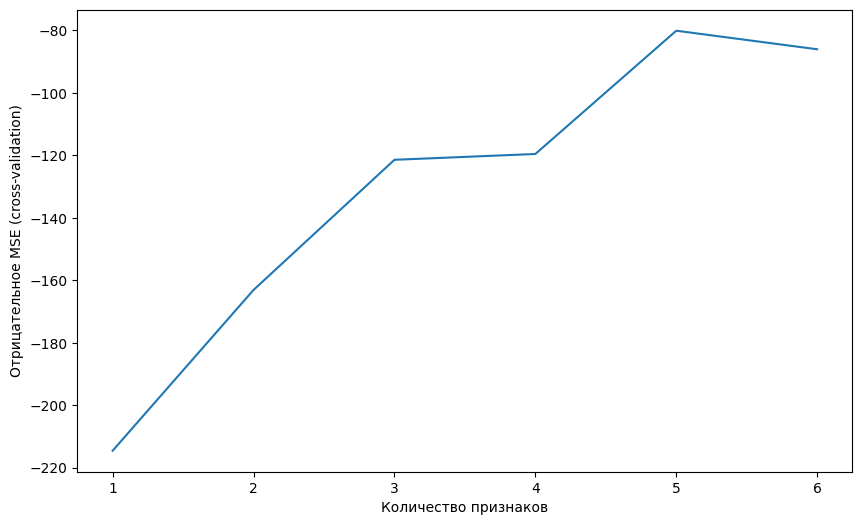

=== Модель с выбранными признаками ===
Количество признаков: 5
=== Обучающая выборка ===
MSE: 70.9190
RMSE: 8.4213
R²: 0.7504
=== тестовая выборка ===
MSE: 53.6076
RMSE: 7.3217
R²: 0.7920


In [165]:
from sklearn.feature_selection import RFECV
X = df_new.drop('target',axis=1)

# Масштабирование признаков(пропускаем столбец единиц для интерсепта)
scaler = StandardScaler()
X_scaled = X
X_scaled= scaler.fit_transform(X)


# Определение модели
model = Ridge(alpha=0.1, random_state=42)

# Применение RFECV для выбора признаков
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_scaled, y)

# Вывод результатов
print("Оптимальное количество признаков : %d" % rfecv.n_features_)
print("Лучшие признаки : %s" % list(X.columns[rfecv.support_]))

# Визуализация
plt.figure(figsize=(10, 6))
plt.xlabel("Количество признаков")
plt.ylabel("Отрицательное MSE (cross-validation)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Обучение модели на выбранных признаках
X_selected = X_scaled[:, rfecv.support_]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("=== Модель с выбранными признаками ===")
print(f"Количество признаков: {X_selected.shape[1]}")
print("=== Обучающая выборка ===")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")
print("=== тестовая выборка ===")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

 ### 13.* (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

Для собственную реализацию напишем цикл для перебора различных комбинаций гиперпараметров

In [175]:
# Возможные значения гиперпараметров
alpha_list = [0.001, 0.01, 0.05, 0.1]
num_iters_list = [500, 1000, 5000,10000]
lambda_reg_list = [0.01 ,0.05, 0.1, 1.0]

X = df_new.drop('target',axis=1).values
y = df_new['target'].values
#Добавление столбца единиц для свободного члена(инстерсепта)
X = np.hstack((np.ones((X.shape[0],1)),X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Для хранения результатов
results = []

for alpha in alpha_list:
    for num_iters in num_iters_list:
        for lambda_reg in lambda_reg_list:
            # Обучение модели
            w = gradient_descent(X_train, y_train, alpha, num_iters, lambda_reg)

            # Предсказания на тестовой выборке
            y_test_pred = X_test.dot(w)

            # Вычисление метрик
            mse_test = mean_squared_error(y_test, y_test_pred)
            r2_test = r2_score(y_test, y_test_pred)

            # Сохранение результатов
            results.append({
                'alpha': alpha,
                'num_iters': num_iters,
                'lambda_reg': lambda_reg,
                'mse_test': mse_test,
                'r2_test': r2_test
            })

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)

# Сортируем по MSE
best_results = results_df.sort_values(by='mse_test').reset_index(drop=True)
print("Лучшие результаты:")
print(best_results)

Лучшие результаты:
    alpha  num_iters  lambda_reg    mse_test   r2_test
0   0.100        500        0.01   53.140892  0.793769
1   0.100       1000        0.01   53.140892  0.793769
2   0.100      10000        0.01   53.140892  0.793769
3   0.100       5000        0.01   53.140892  0.793769
4   0.050       5000        0.01   53.142253  0.793764
..    ...        ...         ...         ...       ...
59  0.001       1000        1.00  291.400121 -0.130874
60  0.001        500        0.01  597.953512 -1.320555
61  0.001        500        0.05  598.757664 -1.323676
62  0.001        500        0.10  599.756434 -1.327552
63  0.001        500        1.00  616.422415 -1.392230

[64 rows x 5 columns]


Для модель Ridge из Sklearn, используем GridSearchCv для подбора гиперпараметров

In [204]:
from sklearn.model_selection import GridSearchCV

# Определение диапазона значений гиперпараметров
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'sag','saga', 'lsqr']
}

X = df_new.drop('target',axis=1).values
y = df_new['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


ridge = Ridge(random_state=42)

# Настройка GridSearchCV
# cv-int, cross-validation generator or an iterable, default=None
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучение моделей на разных комбинациях гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print(f"Оптимальные гиперпараметры: {best_params}")

# Оценка модели с оптимальными гиперпараметрами
best_ridge = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_test_pred = best_ridge.predict(X_test)

# Метрики
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE на тестовой выборке с лучшими гиперпараметрами: {mse_test:.4f}")
print(f"RMSE на тестовой выборке с лучшими гиперпараметрами: {rmse_test:.4f}")
print(f"R² на тестовой выборке с лучшими гиперпараметрами: {r2_test:.4f}")

Оптимальные гиперпараметры: {'alpha': 1, 'solver': 'sag'}
MSE на тестовой выборке с лучшими гиперпараметрами: 53.0075
RMSE на тестовой выборке с лучшими гиперпараметрами: 7.2806
R² на тестовой выборке с лучшими гиперпараметрами: 0.7943


Наблюдая за результатами, мы можем найти Оптимальные гиперпараметры, чтобы минимизировать такие показатели, как среднеквадратичная ошибка (MSE) и максимизировать R2_test . Подставляем эти комбинации в ранее созданную модель и переобучаем.

### 14.* (+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

На каждой итерации SGD случайным образом выбирает один образец из обучающего набора, вычисляет градиент функции потерь и обновляет параметры модели.

$ J(w) = \frac{1}{2} (y^{(i)} - X^{(i)}w)^2 $

$  \nabla J(w) = - (y^{(i)} - X^{(i)}w) X^{(i)}  $

In [220]:
def stochastic_gradient_descent(X, y, alpha=0.01, num_epochs=10, lambda_reg=0.01):
    #- num_epochs: количество эпох обучения
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for epoch in range(num_epochs):
        # Перемешать данные
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

     
        for i in range(0, m):
            X_batch = X_shuffled[i]
            y_batch = y_shuffled[i]

            y_pred = X_batch.dot(w)
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) + lambda_reg * w
            gradient[0] = 1 * np.sum(error) 
            w -= alpha * gradient

        y_pred_all = X.dot(w)
        error_all = y_pred_all - y
        cost = (1 / (2 * m)) * (np.sum(error_all ** 2) + lambda_reg * np.sum(w[1:] ** 2))
        cost_history.append(cost)


        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Cost: {cost:.4f}")

    return w

In [223]:
alpha = 0.005  
num_epochs = 1000
lambda_reg=0.01

X = df_new.drop('target',axis=1).values
y = df_new['target'].values
#Добавление столбца единиц для смешения
X = np.hstack((np.ones((X.shape[0],1)),X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Обучаем модель
w = stochastic_gradient_descent(X_train, y_train, alpha, num_epochs,lambda_reg)

# Функция для предсказания
def predict(X, w):
    return X.dot(w)

# Предсказания на обучающей выборке
y_train_pred = predict(X_train, w)

# Предсказания на тестовой выборке
y_test_pred = predict(X_test, w)

# Вычисление метрик на обучающей выборке
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Вычисление метрик на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("=== Обучающая выборка ===")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n=== Тестовая выборка ===")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

Epoch 1/1000, Cost: 37.2544
Epoch 100/1000, Cost: 35.6012
Epoch 200/1000, Cost: 35.6106
Epoch 300/1000, Cost: 35.3470
Epoch 400/1000, Cost: 35.7610
Epoch 500/1000, Cost: 35.1586
Epoch 600/1000, Cost: 35.8949
Epoch 700/1000, Cost: 36.4155
Epoch 800/1000, Cost: 35.7528
Epoch 900/1000, Cost: 35.6158
Epoch 1000/1000, Cost: 35.9349
=== Обучающая выборка ===
MSE: 71.8670
RMSE: 8.4774
R²: 0.7470

=== Тестовая выборка ===
MSE: 56.7472
RMSE: 7.5331
R²: 0.7798


Давайте сравним полученные данные с предыдущими моделями.<br>
=== Модель Ridge из scikit-learn ===<br>
=== Обучающая выборка ===<br>
MSE: 70.2588<br>
RMSE: 8.3821<br>
R²: 0.7527<br><br>

=== Тестовая выборка ===<br>
MSE: 52.8435<br>
RMSE: 7.2694<br>
R²: 0.7949<br><br>

=== Наша реализация градиентного спуска ===<br>
=== Обучающая выборка ===<br>
MSE: 70.2889<br>
RMSE: 8.3838<br>
R²: 0.7526<br><br>

=== Тестовая выборка ===<br>
MSE: 53.1409<br>
RMSE: 7.2898<br>
R²: 0.7938<br>

### 15.* (+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

Малобатчевый градиентный спуск является компромиссным решением между батчевым градиентным спуском и стохастическим градиентным спуском. Его суть заключается в том, что на каждой итерации используется **batch_size** образцов для обновления параметров.

In [226]:
def mini_batch_gradient_descent(X, y, alpha=0.01, num_epochs=100, batch_size=32, lambda_reg=0.0):

    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for epoch in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

        
            y_pred = X_batch.dot(w)
            error = y_pred - y_batch
            reg_vetor = np.r_[0,lambda_reg*w[1:]]

            gradient = (X_batch.T.dot(error) + reg_vetor) / batch_size
            w -= alpha * gradient

        # 计算并记录当前epoch的损失值
        y_pred_all = X.dot(w)
        error_all = y_pred_all - y
        cost = (1 / (2 * m)) * (np.sum(error_all ** 2) + lambda_reg * np.sum(w[1:] ** 2))
        cost_history.append(cost)

    return w

In [227]:
alpha = 0.005  
num_epochs = 1000
batch_size=32
lambda_reg=0.01

X = df_new.drop('target',axis=1).values
y = df_new['target'].values
#Добавление столбца единиц для смешения
X = np.hstack((np.ones((X.shape[0],1)),X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Обучаем модель
w = mini_batch_gradient_descent(X_train, y_train, alpha, num_epochs ,batch_size,lambda_reg)

# Функция для предсказания
def predict(X, w):
    return X.dot(w)

# Предсказания на обучающей выборке
y_train_pred = predict(X_train, w)

# Предсказания на тестовой выборке
y_test_pred = predict(X_test, w)

# Вычисление метрик на обучающей выборке
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Вычисление метрик на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("=== Обучающая выборка ===")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n=== Тестовая выборка ===")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")

=== Обучающая выборка ===
MSE: 70.2433
RMSE: 8.3811
R²: 0.7527

=== Тестовая выборка ===
MSE: 52.9894
RMSE: 7.2794
R²: 0.7944
